# Predict Customer Life Time Value (CLV)

In [ ]:
# To predict the Customer life time value for an auto insurance company based on different features provided.
# Customer lifetime value is a measure of the average customer's revenue generated over their entire relationship with a company.
# One of the key reasons for measuring CLV is customer retention.
# Focusing on CLV helps to take an optimal decision,design an efficient budget plan,identify valuable customers etc. 

In [96]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Read the dataset
df = pd.read_csv(r'C:\Users\Nisha\Desktop\competition\train.csv',na_values=['?','NA,NA'])
df.head()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [3]:
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# To see maximum no of columns
pd.pandas.set_option('display.max_columns',None)

In [5]:
df.columns = df.columns.str.replace("[.]", "")

In [6]:
df.head()

,CustomerID,CustomerLifetimeValue,Coverage,Education,EmploymentStatus,Gender,Income,LocationGeo,LocationCode,MaritalStatus,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [7]:
df.shape

(9806, 22)

In [8]:
# Check duplicate rows
df.duplicated().value_counts()

False    9806
dtype: int64

In [9]:
# Check basic infrormation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9806 entries, 0 to 9805
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  9806 non-null   int64  
 1   CustomerLifetimeValue       9806 non-null   float64
 2   Coverage                    8881 non-null   object 
 3   Education                   9677 non-null   object 
 4   EmploymentStatus            9688 non-null   object 
 5   Gender                      9677 non-null   object 
 6   Income                      9688 non-null   float64
 7   LocationGeo                 9687 non-null   object 
 8   LocationCode                9687 non-null   object 
 9   MaritalStatus               9677 non-null   object 
 10  MonthlyPremiumAuto          9012 non-null   float64
 11  MonthsSinceLastClaim        9806 non-null   int64  
 12  MonthsSincePolicyInception  9806 non-null   int64  
 13  NumberofOpenComplaints      8988 

In [10]:
# Checking null values
df.isnull().sum()

CustomerID                      0
CustomerLifetimeValue           0
Coverage                      925
Education                     129
EmploymentStatus              118
Gender                        129
Income                        118
LocationGeo                   119
LocationCode                  119
MaritalStatus                 129
MonthlyPremiumAuto            794
MonthsSinceLastClaim            0
MonthsSincePolicyInception      0
NumberofOpenComplaints        818
NumberofPolicies              121
PolicyType                    891
Policy                        121
RenewOfferType                128
SalesChannel                  128
TotalClaimAmount                0
VehicleClass                  126
VehicleSize                   126
dtype: int64

In [11]:
# Statistical information
df.describe()

,CustomerID,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount,VehicleSize
count,9806.000000,9806.000000,9688.000000,9012.000000,9806.000000,9806.000000,8988.000000,9685.000000,9806.000000,9680.000000
mean,5778.381807,7998.047015,37511.054604,93.340657,15.143993,48.165001,0.379172,2.960351,438.266734,2.089773
std,3343.286093,6848.055899,30292.974468,34.417763,10.004327,27.963630,0.896427,2.389801,293.502301,0.538524
min,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2879.250000,4013.949039,0.000000,68.750000,6.000000,24.000000,0.000000,1.000000,280.352767,2.000000
50%,5783.000000,5780.182197,33767.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.007015,2.000000
75%,8678.750000,8960.280213,62018.000000,109.000000,23.000000,71.750000,0.000000,4.000000,553.540973,2.000000
max,11573.000000,83325.381190,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,3.000000


In [12]:
# To check numerical and categorical columns 
num_col=df.select_dtypes(include=['int64','float64']).columns
cat_col=df.select_dtypes(include=['object']).columns
num_col,cat_col

(Index(['CustomerID', 'CustomerLifetimeValue', 'Income', 'MonthlyPremiumAuto',
        'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
        'NumberofOpenComplaints', 'NumberofPolicies', 'TotalClaimAmount',
        'VehicleSize'],
       dtype='object'),
 Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'LocationGeo',
        'LocationCode', 'MaritalStatus', 'PolicyType', 'Policy',
        'RenewOfferType', 'SalesChannel', 'VehicleClass'],
       dtype='object'))

In [13]:
# Find missing values

In [23]:
def find_missing_percent(df):
    '''
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    '''
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in df.columns:
        sum_miss_val = df[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/df.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),
                                 ignore_index=True)
    return (miss_df[miss_df['PercentMissing']>0.0])

miss_df = find_missing_percent(df)

'''Displays columns with missing values '''

display(miss_df)
print("\n")
print("Number of columns with missing values:",(miss_df.shape[0]))

,ColumnName,TotalMissingVals,PercentMissing
2,Coverage,925.0,9.43
3,Education,129.0,1.32
4,EmploymentStatus,118.0,1.20
5,Gender,129.0,1.32
6,Income,118.0,1.20
7,LocationGeo,119.0,1.21
8,LocationCode,119.0,1.21
9,MaritalStatus,129.0,1.32
10,MonthlyPremiumAuto,794.0,8.10
13,NumberofOpenComplaints,818.0,8.34




Number of columns with missing values: 17


In [ ]:
# percentage of missing values are very less in each column.

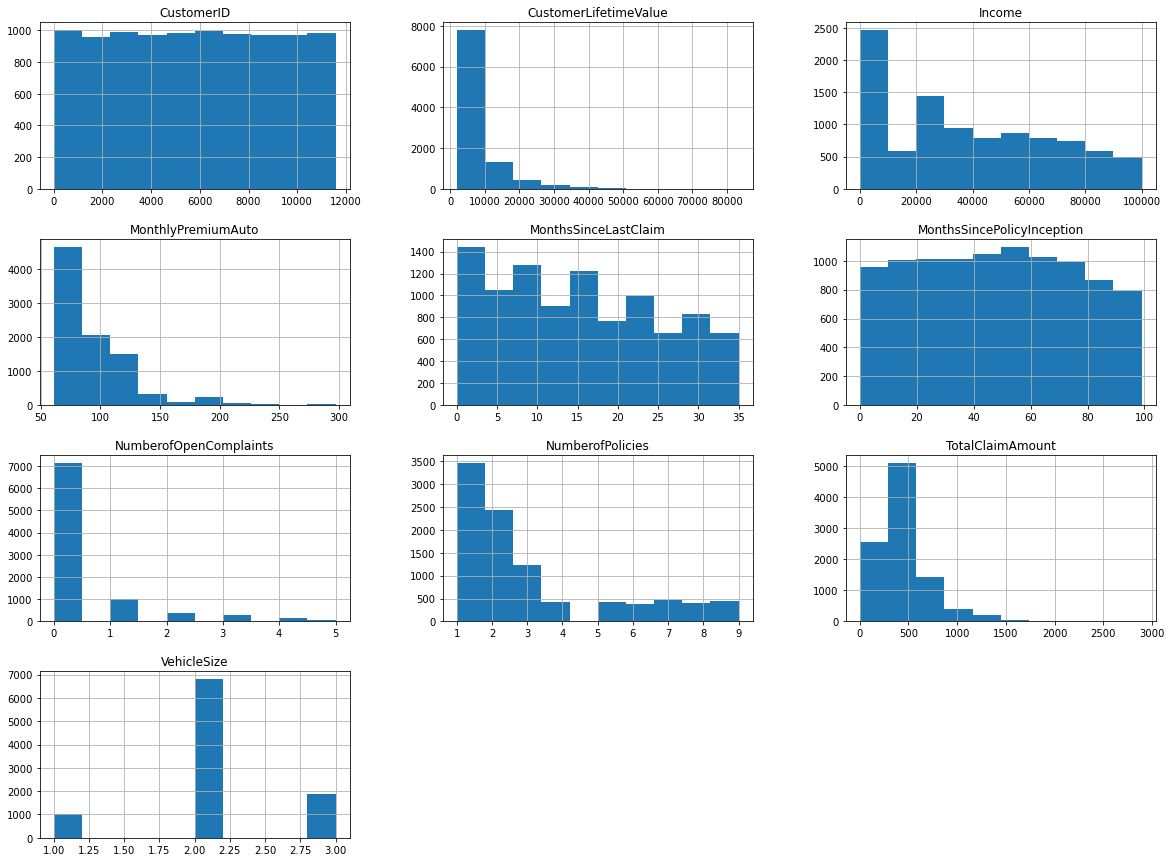

In [27]:
# EDA
# Univariate analysis on numerical features
# Histogram to check the distribution of all the numerical columns
df.select_dtypes(include=['int64','float64']).hist(figsize = (20,15))
plt.show()

In [46]:
cat_col1=df.select_dtypes(include=['object']).columns.drop('LocationGeo')

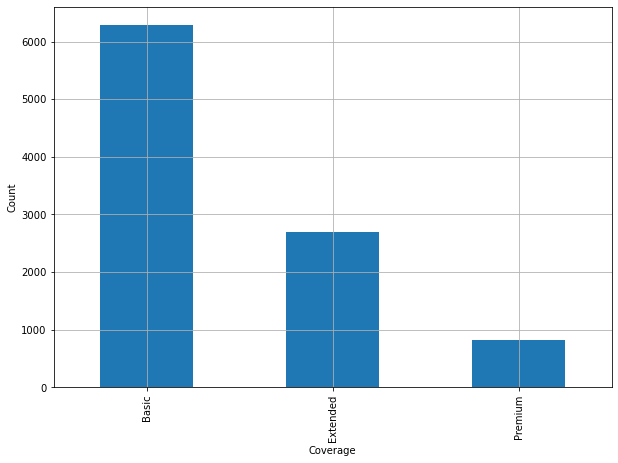

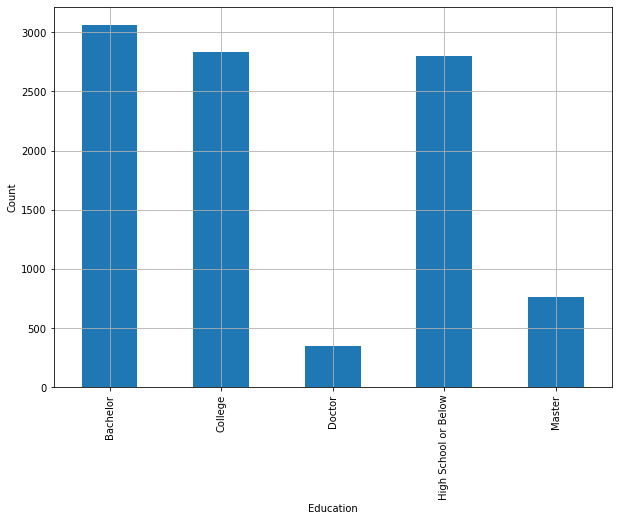

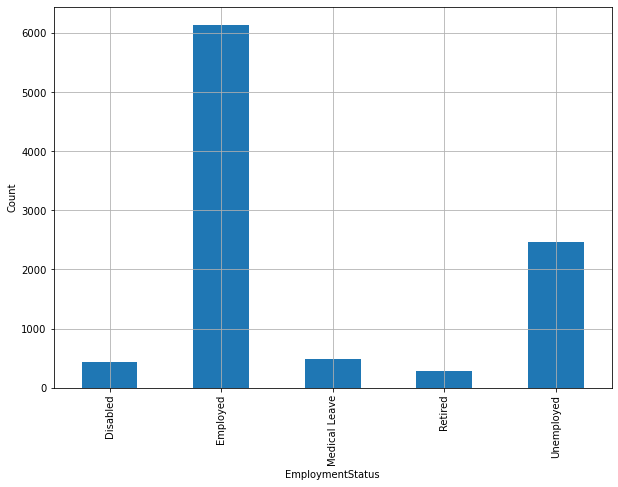

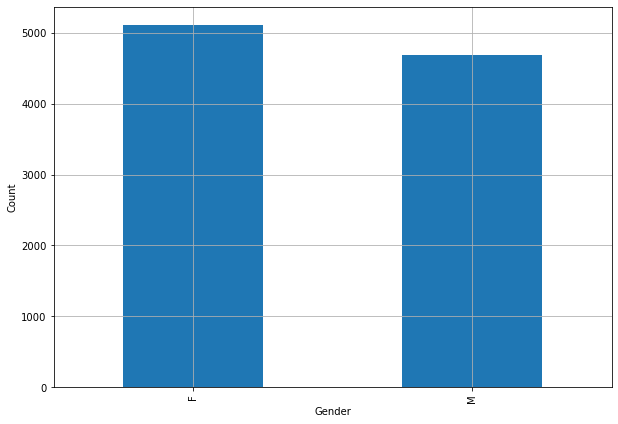

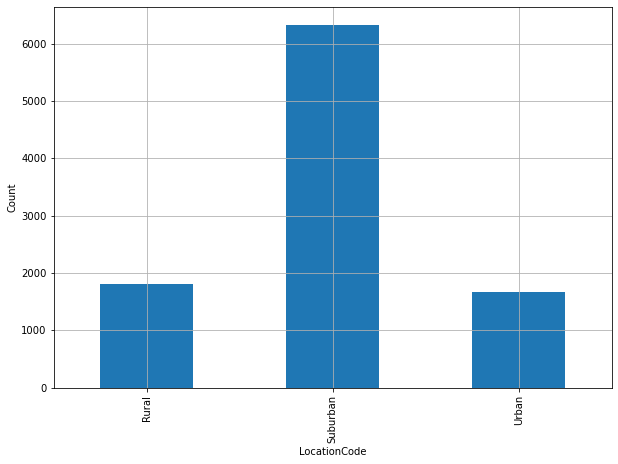

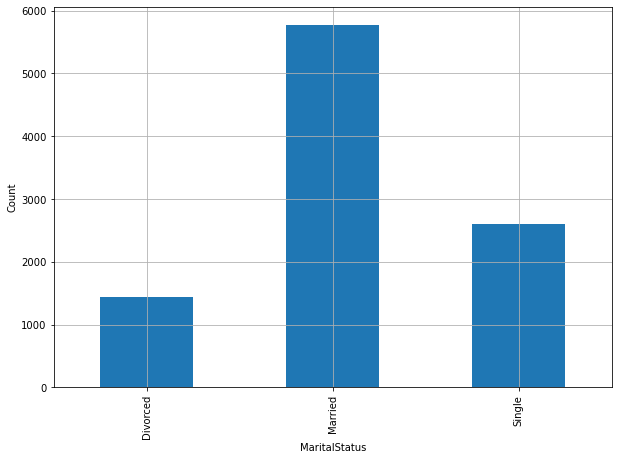

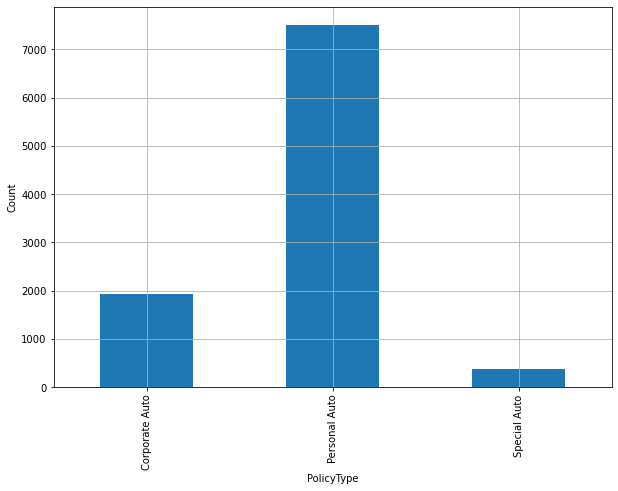

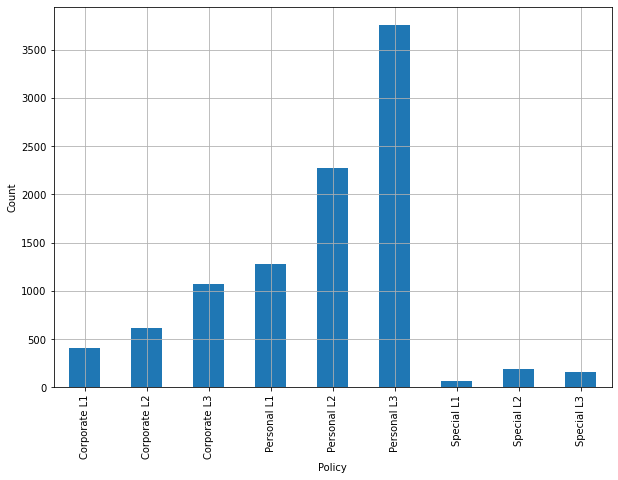

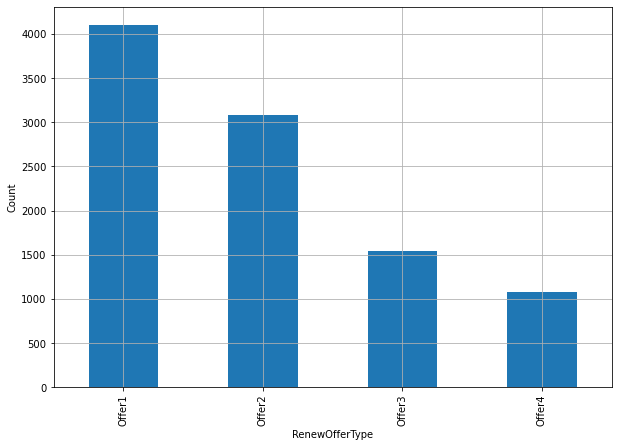

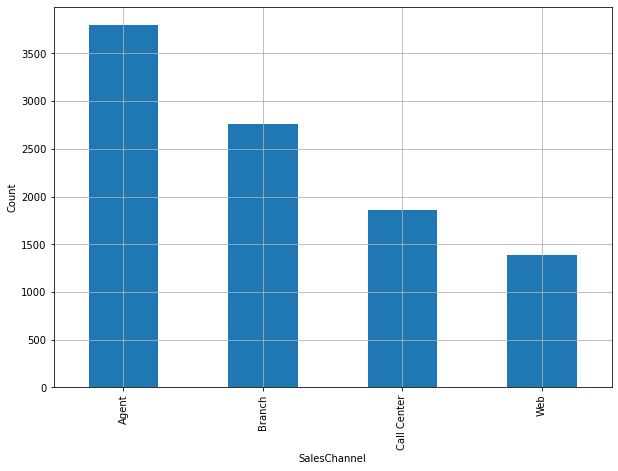

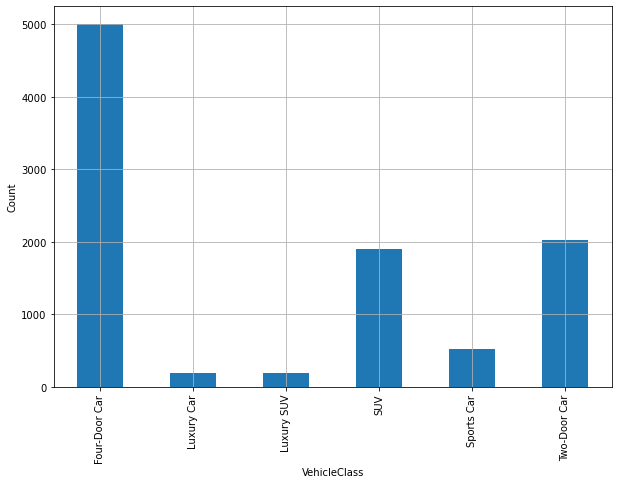

In [47]:
# Univariate Analysis on Categorical Features 
for i in cat_col1:
    df.groupby(i)['CustomerID'].count().plot(kind='bar', grid=True,figsize=(10,7)).set_ylabel('Count')
    plt.show()

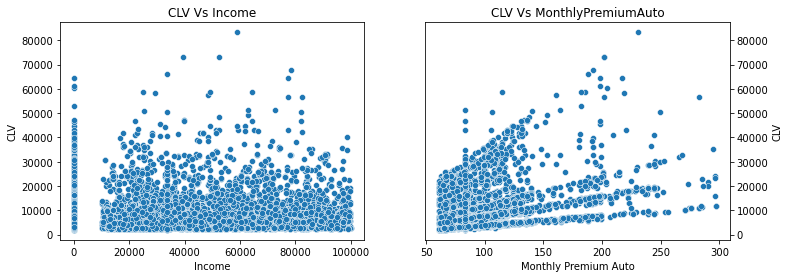

In [49]:
# Bivariate Analyis on Numeric feature
#CLV Vs Income/ CLV Vs MonthlyPremiumAuto
fig,axes = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x="Income",y="CustomerLifetimeValue",data=df,ax=axes[0])
sns.scatterplot(x="MonthlyPremiumAuto",y="CustomerLifetimeValue",data=df,ax=axes[1])
axes[0].set(xlabel='Income',ylabel='CLV',title = 'CLV Vs Income')
axes[1].set(xlabel='Monthly Premium Auto',ylabel='CLV',title = 'CLV Vs MonthlyPremiumAuto')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

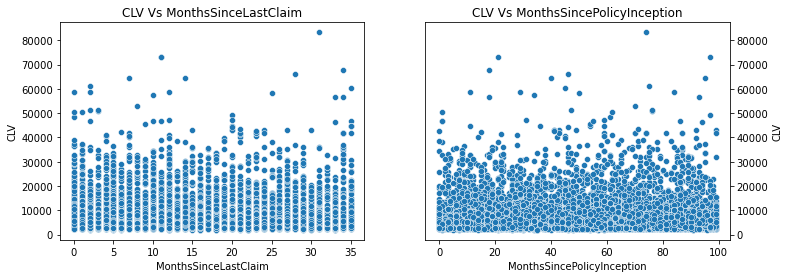

In [51]:
#CLV Vs MonthsSinceLastClaim/ CLV Vs MonthsSincePolicyInception
fig,axes = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x="MonthsSinceLastClaim",y="CustomerLifetimeValue",data=df,ax=axes[0])
sns.scatterplot(x="MonthsSincePolicyInception",y="CustomerLifetimeValue",data=df,ax=axes[1])
axes[0].set(xlabel='MonthsSinceLastClaim',ylabel='CLV',title = 'CLV Vs MonthsSinceLastClaim')
axes[1].set(xlabel='MonthsSincePolicyInception',ylabel='CLV',title = 'CLV Vs MonthsSincePolicyInception')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

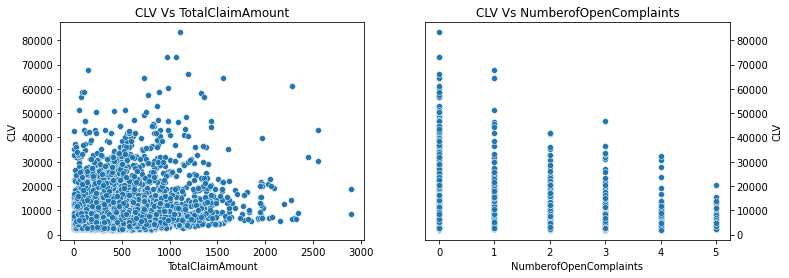

In [52]:
#CLV Vs TotalClaimAmount/ CLV Vs NumberofOpenComplaints
fig,axes = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x="TotalClaimAmount",y="CustomerLifetimeValue",data=df,ax=axes[0])
sns.scatterplot(x="NumberofOpenComplaints",y="CustomerLifetimeValue",data=df,ax=axes[1])
axes[0].set(xlabel='TotalClaimAmount',ylabel='CLV',title = 'CLV Vs TotalClaimAmount')
axes[1].set(xlabel='NumberofOpenComplaints',ylabel='CLV',title = 'CLV Vs NumberofOpenComplaints')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

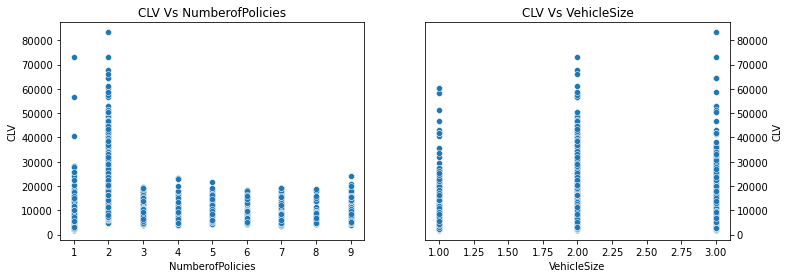

In [53]:
#CLV Vs NumberofPolicies/ CLV Vs VehicleSize
fig,axes = plt.subplots(1,2,figsize = (12,4))
sns.scatterplot(x="NumberofPolicies",y="CustomerLifetimeValue",data=df,ax=axes[0])
sns.scatterplot(x="VehicleSize",y="CustomerLifetimeValue",data=df,ax=axes[1])
axes[0].set(xlabel='NumberofPolicies',ylabel='CLV',title = 'CLV Vs NumberofPolicies')
axes[1].set(xlabel='VehicleSize',ylabel='CLV',title = 'CLV Vs VehicleSize')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

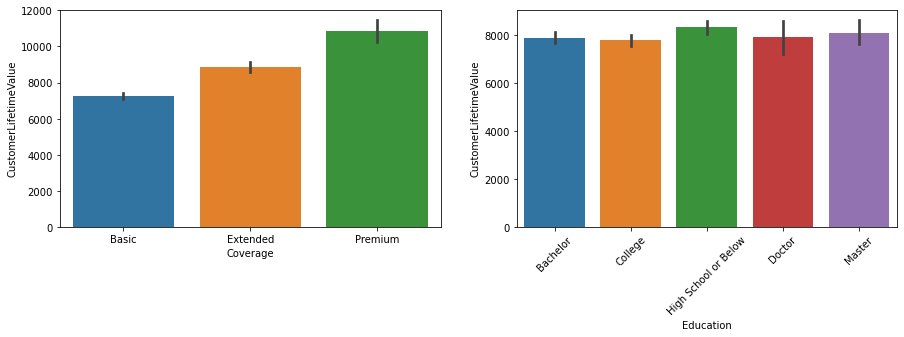

In [54]:
# Bivariate Analysis on Categorical Features 
# Effect of Coverage,Education on CLV 
fig,axes = plt.subplots(1,2,figsize = (15,4))
sns.barplot(x='Coverage',y="CustomerLifetimeValue",data=df, ax=axes[0])
sns.barplot(x='Education',y="CustomerLifetimeValue",data=df,ax=axes[1])
plt.xticks(rotation=45)
plt.show()

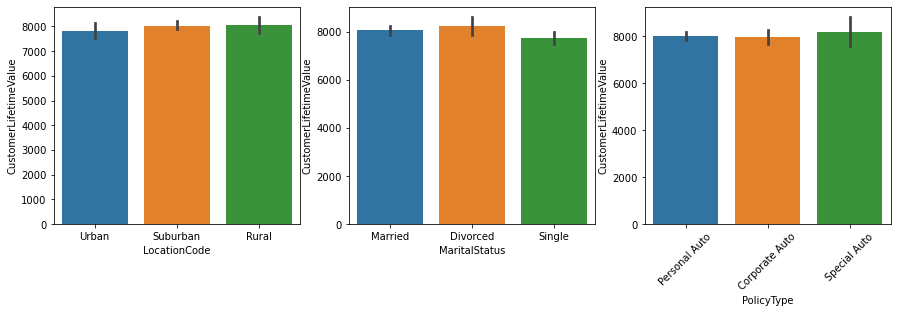

In [55]:
# Effect of 'LocationCode', 'MaritalStatus', 'PolicyType', on CLV 
fig,axes = plt.subplots(1,3,figsize = (15,4))
sns.barplot(x='LocationCode',y="CustomerLifetimeValue",data=df, ax=axes[0])
sns.barplot(x='MaritalStatus',y="CustomerLifetimeValue",data=df,ax=axes[1])
sns.barplot(x='PolicyType',y="CustomerLifetimeValue",data=df,ax=axes[2])
plt.xticks(rotation=45)
plt.show()

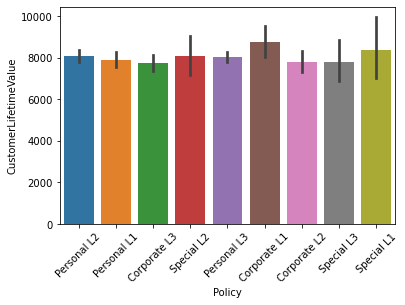

In [57]:
#Effect of 'Policy' on CLV
sns.barplot(x='Policy',y="CustomerLifetimeValue",data=df)
plt.xticks(rotation=45)
plt.show()

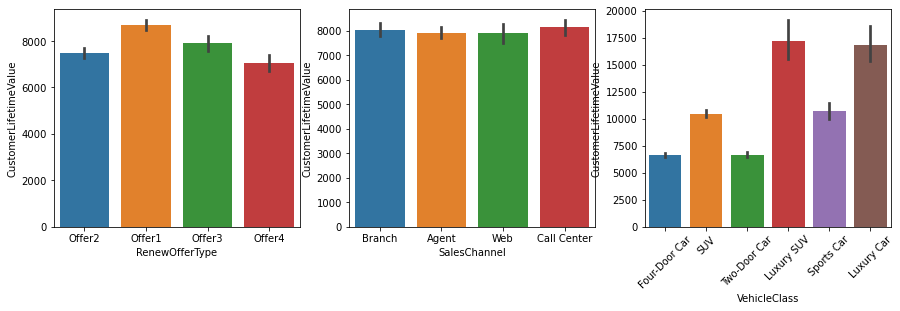

In [58]:
#Effect of 'RenewOfferType', 'SalesChannel', 'VehicleClass' on CLV
fig,axes = plt.subplots(1,3,figsize = (15,4))
sns.barplot(x='RenewOfferType',y="CustomerLifetimeValue",data=df, ax=axes[0])
sns.barplot(x='SalesChannel',y="CustomerLifetimeValue",data=df,ax=axes[1])
sns.barplot(x='VehicleClass',y="CustomerLifetimeValue",data=df,ax=axes[2])
plt.xticks(rotation=45)
plt.show()

In [14]:
# Preprocessing
# Fill missing values
# Since distributions of 'Income' and 'MonthlyPremiumAuto' are right skewed,use median to fill missing values.
df['Income'] = df['Income'].fillna(df['Income'].median())
df['MonthlyPremiumAuto'] = df['MonthlyPremiumAuto'].fillna(df['MonthlyPremiumAuto'].median())

In [15]:
# The following are discrete numerical variables and will be considered as categorical columns for modelling.
#'NumberofOpenComplaints', 'NumberofPolicies', ,'VehicleSize'
# mode imputation will be done for the following columns

cat_cols_all = ['Coverage','Education','EmploymentStatus','Gender','LocationGeo','LocationCode',
                'MaritalStatus','NumberofOpenComplaints','NumberofPolicies','VehicleSize','PolicyType',
               'Policy','RenewOfferType','SalesChannel','VehicleClass']
for i in cat_cols_all:
    df[i] = df[i].fillna(df[i].mode()[0])

In [16]:
df.isnull().sum()

CustomerID                    0
CustomerLifetimeValue         0
Coverage                      0
Education                     0
EmploymentStatus              0
Gender                        0
Income                        0
LocationGeo                   0
LocationCode                  0
MaritalStatus                 0
MonthlyPremiumAuto            0
MonthsSinceLastClaim          0
MonthsSincePolicyInception    0
NumberofOpenComplaints        0
NumberofPolicies              0
PolicyType                    0
Policy                        0
RenewOfferType                0
SalesChannel                  0
TotalClaimAmount              0
VehicleClass                  0
VehicleSize                   0
dtype: int64

In [ ]:
# All missing values are filled.

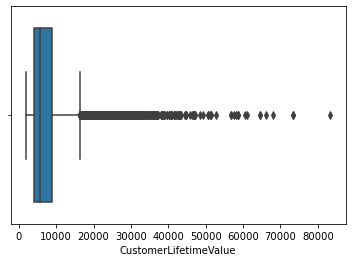

In [59]:
# Outlier detection and handling 
# Target variable analysis 
sns.boxplot(df['CustomerLifetimeValue'])
plt.show()

In [ ]:
# Although we are seeing outliers in the target variable CLV, this should not be handled as they are influential points.

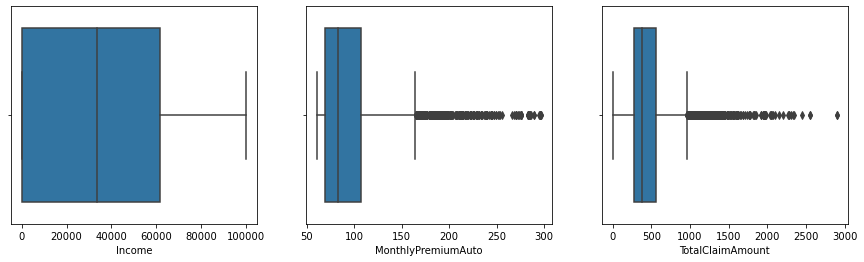

In [60]:
fig,axes = plt.subplots(1,3,figsize = (15,4))
sns.boxplot(data = df, x= 'Income',ax=axes[0])
sns.boxplot(data = df, x= 'MonthlyPremiumAuto',ax=axes[1])
sns.boxplot(data = df, x='TotalClaimAmount',ax=axes[2])
plt.show()

In [ ]:
# we can see that there are outliers in MonthlyPremiumAutoand TotalClaimAmount but there is a positive linear realtionship for these two variables to CLV.
# Since our dataset is related to insurance industry, we must be accept the outliers,as they can be our potential customers.
# So No outlier treatment required.

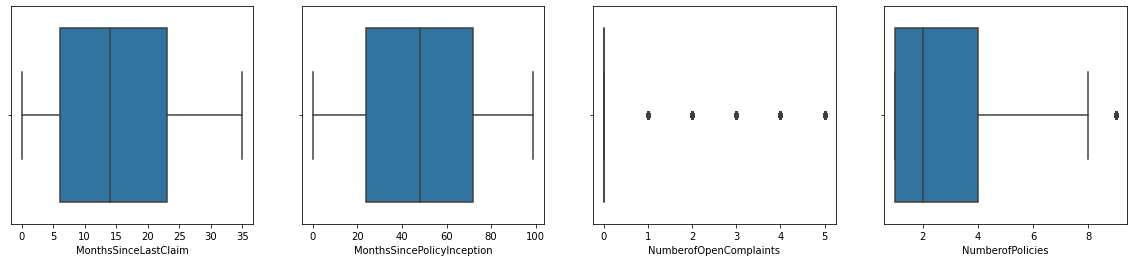

In [61]:
fig,axes = plt.subplots(1,4,figsize = (20,4))
sns.boxplot(data = df, x= 'MonthsSinceLastClaim',ax=axes[0])
sns.boxplot(data = df, x= 'MonthsSincePolicyInception',ax=axes[1])
sns.boxplot(data = df, x='NumberofOpenComplaints',ax=axes[2])
sns.boxplot(data = df, x='NumberofPolicies',ax=axes[3])
plt.show()

In [62]:
Q1=df['NumberofPolicies'].quantile(0.01)
Q3=df['NumberofPolicies'].quantile(0.99)
IQR=Q3-Q1
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
df[(df['NumberofPolicies'] > (Q3 + 1.5*IQR))].shape

(0, 22)

In [64]:
Q1=df['NumberofOpenComplaints'].quantile(0.01)
Q3=df['NumberofOpenComplaints'].quantile(0.99)
IQR=Q3-Q1
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
df[(df['NumberofPolicies'] > (Q3 + 1.5*IQR))].shape

(0, 22)

In [65]:
# There are no extreme outliers. 

In [ ]:
# Feature engineering
# LocationGeo contains the latitude,longitude separated by a delimter comma. 
# considering to covert this geolocation data into zones. Using KNN clustering algorithm to group the data and assign each cluster a unique ID. 
# These unique IDs will replace the LocationGeo column.

In [17]:
df1= pd.DataFrame()
df1['LocationGeo']=df['LocationGeo'].unique()
df1['Count_Column'] = df1['LocationGeo'].map(df['LocationGeo'].value_counts()) 
df1[['Lat','Long']]= df1['LocationGeo'].str.split(',', n=1, expand=True)
df1['Lat'] =df1['Lat'].astype(float)
df1['Long']=df1['Long'].astype(float)

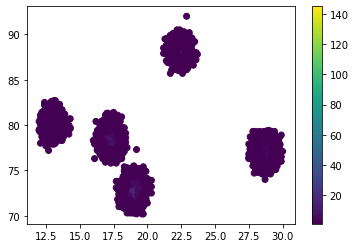

In [19]:
#Plotting the LocationGeo in a heat map.
plt.scatter('Lat', 'Long',data=df1,c='Count_Column')
plt.colorbar()
plt.show()

In [29]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
backup_data = df.copy()
df[['Latitude','Longitude']]= df['LocationGeo'].str.split(',', n=1, expand=True)
X=df.loc[:,['CustomerID','Latitude','Longitude']]
X.head()

,CustomerID,Latitude,Longitude
0,5917,17.7,77.7
1,2057,28.8,76.6
2,4119,21.6,88.4
3,1801,19,72.5
4,9618,19.1,74.7


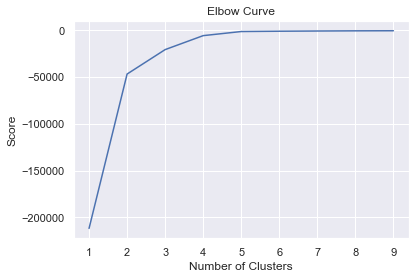

In [30]:
#KNN Elbow method
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
centers = kmeans.cluster_centers_
print(centers)

[[18.99634717 72.78819404]
 [28.70834697 77.06012002]
 [17.30597726 78.40715072]
 [22.47995846 88.33125649]
 [12.98792102 80.22636469]]


In [32]:
X.tail()

,CustomerID,Latitude,Longitude,cluster_label
9801,3735,12.7,79.4,4
9802,5988,18.6,72.3,0
9803,8767,19.2,74.7,0
9804,9900,19.5,73.9,0
9805,11323,17.2,78.2,2


In [35]:
clustered_data = df.merge(X, left_on='CustomerID', right_on='CustomerID')
clustered_data.head(5)

,CustomerID,CustomerLifetimeValue,Coverage,Education,EmploymentStatus,Gender,Income,LocationGeo,LocationCode,MaritalStatus,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize,Latitude_x,Longitude_x,Latitude_y,Longitude_y,cluster_label
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,67.0,2,33,0.0,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0,17.7,77.7,17.7,77.7,2
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0,28.8,76.6,28.8,76.6,1
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0,21.6,88.4,21.6,88.4,3
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,116.0,2,15,0.0,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0,19,72.5,19,72.5,0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0,19.1,74.7,19.1,74.7,0


In [39]:
clustered_data = clustered_data.drop(['Latitude_x','Longitude_x','Latitude_y','Longitude_y','LocationGeo'],axis=1)

In [40]:
clustered_data.rename(columns = {'cluster_label':'Zones'}, inplace = True)

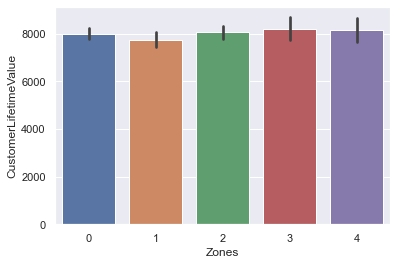

In [41]:
#Effect of Zones on CLV
sns.barplot(x='Zones',y="CustomerLifetimeValue",data=clustered_data)
plt.show()

<AxesSubplot:>

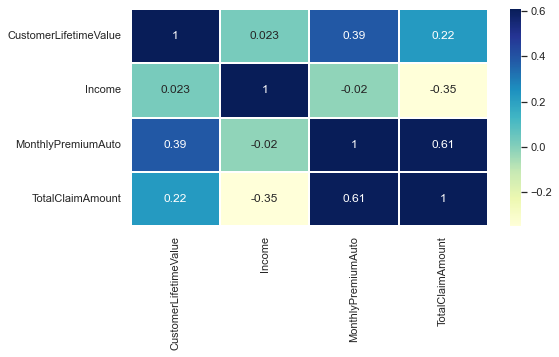

In [42]:
#Correlation matrix for numeric variables
corrmatrix = clustered_data[['CustomerLifetimeValue','Income','MonthlyPremiumAuto','TotalClaimAmount']].corr()
plt.subplots(figsize = (8,4))
sns.heatmap(corrmatrix,vmin= -0.35,vmax = 0.61,annot=True,linewidth = 0.2,cmap='YlGnBu')

In [43]:
# Total Claim Amount and Monthly Premium Amount are correlated, but not high enough to consider dropping it. 
# Check how each of the independent variables are contributing towards the target variable.

In [44]:
# H0:The null hypothesis of the test is the data is normally distributed
# HA:The data is not normally distributed
data1 = clustered_data.copy()
import scipy.stats as stats
stats.shapiro(data1['CustomerLifetimeValue'])  

ShapiroResult(statistic=0.7045354843139648, pvalue=0.0)

In [ ]:
# p-value less than 0.05 we reject null hypothesis the data is not normally distributed
# We will proceed with non parametric tests since the dependent variable is not normally distributed

In [45]:
columns_cat = data1.select_dtypes('object').columns
no_col = ['NumberofOpenComplaints','NumberofPolicies']

cat_cols = ['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'LocationCode',
       'MaritalStatus', 'PolicyType', 'Policy', 'RenewOfferType',
       'SalesChannel', 'VehicleClass','NumberofOpenComplaints','NumberofPolicies']

In [46]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (data1[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Coverage', 'Education', 'EmploymentStatus', 'LocationCode', 'MaritalStatus', 'PolicyType', 'Policy', 'RenewOfferType', 'SalesChannel', 'VehicleClass']
TTest: ['Gender']


In [47]:
# H0: the distributions of both populations are equal.
# H1: the distributions are not equal.
male=data1[data1['Gender']=='M']['CustomerLifetimeValue']
female=data1[data1['Gender']=='F']['CustomerLifetimeValue']
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=11930764.0, pvalue=0.6339583500041674)


In [ ]:
# p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.
# we test Gender with non-Paramteric unpaired ttest and we concluded that this feature is not significant to predict traget.

In [48]:
#Kruskal test
#H0:the mean ranks of the groups are the same.
#H1:the mean ranks of the groups are not the same.
Ba=data1[data1['Coverage']=='Basic']['CustomerLifetimeValue']
Ex=data1[data1['Coverage']=='Extended']['CustomerLifetimeValue']
Pr=data1[data1['Coverage']=='Premium']['CustomerLifetimeValue']
c =stats.kruskal(Ba,Ex,Pr)
print(c)  

KruskalResult(statistic=472.8233614277337, pvalue=2.1267263329048554e-103)


In [49]:
# p-value < 0.05 .
# So reject H0, Coverage is significant 

In [50]:
Ba=data1[data1['Education']=='Bachelor']['CustomerLifetimeValue']
Co=data1[data1['Education']=='College']['CustomerLifetimeValue']
Hi=data1[data1['Education']=='High School or Below']['CustomerLifetimeValue']
Ma=data1[data1['Education']=='Master']['CustomerLifetimeValue']
Da=data1[data1['Education']=='Doctor']['CustomerLifetimeValue']
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=11.219903466886922, pvalue=0.024200659801716193)


In [51]:
# p-value < 0.05.So reject H0 - Education is significant

In [52]:
Ba=data1[data1['EmploymentStatus']=='Employed']['CustomerLifetimeValue']
Co=data1[data1['EmploymentStatus']=='Unemployed']['CustomerLifetimeValue']
Hi=data1[data1['EmploymentStatus']=='Medical Leave']['CustomerLifetimeValue']
Ma=data1[data1['EmploymentStatus']=='Disabled']['CustomerLifetimeValue']
Da=data1[data1['EmploymentStatus']=='Retired']['CustomerLifetimeValue']
e = stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=35.501411131966314, pvalue=3.6642419054757866e-07)


In [53]:
# p-value < 0.05 reject H0, EmploymentStatus is significant in predicting CLV

In [54]:
Ba=data1[data1['LocationCode']=='Suburban']['CustomerLifetimeValue']
Co=data1[data1['LocationCode']=='Rural']['CustomerLifetimeValue']
Hi=data1[data1['LocationCode']=='Urban']['CustomerLifetimeValue']
g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=1.269875064575293, pvalue=0.5299685932092012)


In [55]:
# p-value > 0.05 fail to reject H0, Location Code not significant in predicting CLV

In [56]:
Ba=data1[data1['MaritalStatus']=='Married']['CustomerLifetimeValue']
Co=data1[data1['MaritalStatus']=='Single']['CustomerLifetimeValue']
Hi=data1[data1['MaritalStatus']=='Divorced']['CustomerLifetimeValue']
h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=15.139241863941148, pvalue=0.0005158879681879683)


In [57]:
# p-value < 0.05 reject H0, Marital Status can be significant in predicting CLV

In [58]:
Ba=data1[data1['NumberofOpenComplaints']==0]['CustomerLifetimeValue']
Co=data1[data1['NumberofOpenComplaints']==1]['CustomerLifetimeValue']
Hi=data1[data1['NumberofOpenComplaints']==2]['CustomerLifetimeValue']
Ma=data1[data1['NumberofOpenComplaints']==3]['CustomerLifetimeValue']
Da=data1[data1['NumberofOpenComplaints']==4]['CustomerLifetimeValue']
As=data1[data1['NumberofOpenComplaints']==5]['CustomerLifetimeValue']
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=35.079131844018214, pvalue=1.4509157361261298e-06)


In [59]:
# p-value < 0.05 reject H0, Number of Open Complaints can be significant in predicting CLV

In [60]:
Ba=data1[data1['NumberofPolicies']==1]['CustomerLifetimeValue']
Co=data1[data1['NumberofPolicies']==2]['CustomerLifetimeValue']
Hi=data1[data1['NumberofPolicies']==3]['CustomerLifetimeValue']
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=5222.623793895588, pvalue=0.0)


In [61]:
# p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV

In [62]:
Ba=data1[data1['PolicyType']=='Personal Auto']['CustomerLifetimeValue']
Co=data1[data1['PolicyType']=='Corporate Auto']['CustomerLifetimeValue']
Hi=data1[data1['PolicyType']=='Special Auto']['CustomerLifetimeValue']
i = stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=1.067202646716466, pvalue=0.586489025239247)


In [63]:
# p-value > 0.05 failed to reject H0, Policy Type may not be significant in predicting CLV

In [64]:
Ba=data1[data1['Policy']=='Personal L3']['CustomerLifetimeValue']
Co=data1[data1['Policy']=='Personal L2']['CustomerLifetimeValue']
Hi=data1[data1['Policy']=='Personal L1']['CustomerLifetimeValue']
Ma=data1[data1['Policy']=='Corporate L3']['CustomerLifetimeValue']
Da=data1[data1['Policy']=='Corporate L2']['CustomerLifetimeValue']
Ca=data1[data1['Policy']=='Corporate L1']['CustomerLifetimeValue']
s1=data1[data1['Policy']=='Special L2']['CustomerLifetimeValue']
s2=data1[data1['Policy']=='Special L3']['CustomerLifetimeValue']
s3=data1[data1['Policy']=='Special L1']['CustomerLifetimeValue']
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=7.925173835034309, pvalue=0.44081336128503557)


In [65]:
# p-value > 0.05 failed to reject H0, Policy may not be significant in predicting CLV

In [66]:
Ba=data1[data1['RenewOfferType']=='Offer1']['CustomerLifetimeValue']
Co=data1[data1['RenewOfferType']=='Offer2']['CustomerLifetimeValue']
Hi=data1[data1['RenewOfferType']=='Offer3']['CustomerLifetimeValue']
Ma=data1[data1['RenewOfferType']=='Offer4']['CustomerLifetimeValue']
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=177.91498799088953, pvalue=2.487243652856583e-38)


In [67]:
# p-value < 0.05 reject H0, renewal Offer Type can be significant in predicting CLV

In [68]:
Ba=data1[data1['SalesChannel']=='Agent']['CustomerLifetimeValue']
Co=data1[data1['SalesChannel']=='Branch']['CustomerLifetimeValue']
Hi=data1[data1['SalesChannel']=='Call Center']['CustomerLifetimeValue']
Ma=data1[data1['SalesChannel']=='Web']['CustomerLifetimeValue']
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=2.704621022786943, pvalue=0.43944257107206186)


In [69]:
# p-value > 0.05 failed to reject H0, Sales Channel may not be significant in predicting CLV

In [70]:
Ba=data1[data1['VehicleClass']=='Four-Door Car']['CustomerLifetimeValue']
Co=data1[data1['VehicleClass']=='Two-Door Car']['CustomerLifetimeValue']
Hi=data1[data1['VehicleClass']=='SUV']['CustomerLifetimeValue']
Ma=data1[data1['VehicleClass']=='Sports Car']['CustomerLifetimeValue']
Da=data1[data1['VehicleClass']=='Luxury SUV']['CustomerLifetimeValue']
Ca=data1[data1['VehicleClass']=='Luxury Car']['CustomerLifetimeValue']
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=1405.7016955010517, pvalue=8.004612390735793e-302)


In [71]:
# p-value < 0.05 So reject H0, Vehicle Class can be significant in predicting CLV

In [72]:
p_values = [c[1],d[1],e[1],b[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],o[1],p[1]]
p_df = pd.DataFrame(p_values,index=(cat_cols),columns=['P_Value'])
p_df = p_df.reset_index()

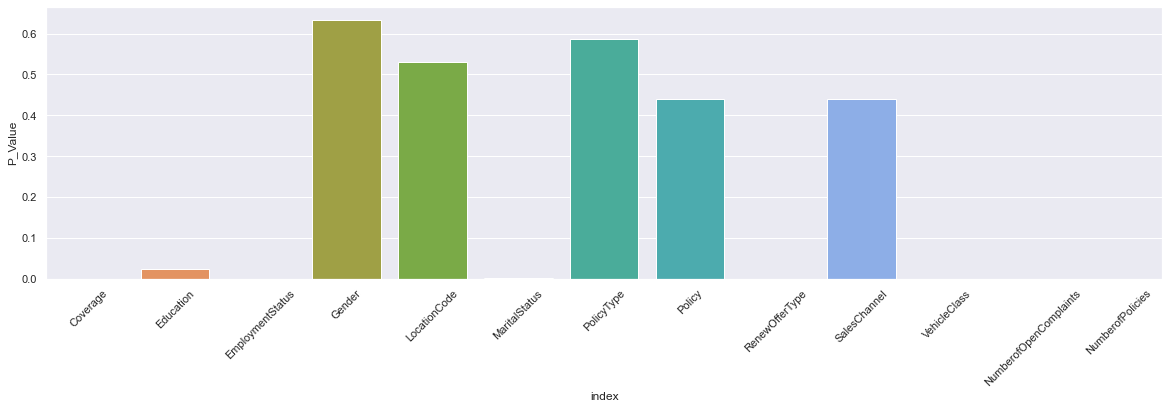

In [73]:
plt.figure(figsize=(20,5))
sns.barplot(x='index',y='P_Value',data=p_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Coverage,Education,EmploymentStatus,Marital Status, Renew Offer Type, Vehicle class, Vehicle class, Number of open complaints and No of Policies play a significant role in predicting the CLV

In [74]:
# Feature selection
backup_clustered_data = clustered_data.copy()

In [75]:
#Dropping  columns based on EDA and Statistical significance
#numerical features - CustomerID,Income
#Categorical Features  - Gender,LocationCode,PolicyType,Policy,SalesChannel
df_en = clustered_data.drop(['CustomerID','Income','Gender','LocationCode','PolicyType',
                             'Policy','SalesChannel'],axis=1)

In [76]:
# Encoding
#'Coverage' - Ordinal - Label Encoding
#'Education' - Ordinal - Label Encoding
#'EmploymentStatus' - Nominal- one hot Encoding
#'Gender' - binary - Label Encoding
#'LocationCode' - Nominal - One Hot Encoding
#'MaritalStatus' - Nominal -One Hot Encoding
#'PolicyType' - Nominal - One hot Encoding
#'Policy' - Nominal - One hot encoding
#'RenewOfferType' - Nominal - One hot encoding
#'SalesChannel' - Nominal - One hot encoding
#'VehicleClass' - Nominal - One hot encoding

In [77]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a=['Coverage','Education']
for i in np.arange(len(a)):
    df_en[a[i]] = label_en.fit_transform(df_en[a[i]])

In [78]:
#Onehot Encoding 
encoded_data = pd.get_dummies(df_en)
encoded_data.head(3)

,CustomerLifetimeValue,Coverage,Education,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount,VehicleSize,Zones,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,RenewOfferType_Offer1,RenewOfferType_Offer2,RenewOfferType_Offer3,RenewOfferType_Offer4,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car
0,7824.372789,0,0,67.0,2,33,0.0,2.0,267.214383,2.0,2,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
1,8005.964669,0,1,101.0,26,42,0.0,5.0,565.508572,2.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,8646.504109,0,3,108.0,3,44,0.0,3.0,369.818708,1.0,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [79]:
# Normalization 
#defining the dependent and independent variables 
X=encoded_data.drop(['CustomerLifetimeValue'],axis=1)
y=encoded_data['CustomerLifetimeValue']

In [80]:
#Performing Standard scaling
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#X = scale.fit_transform(X)

In [81]:
#Performing Min Max scaling 
from sklearn import preprocessing 
X=encoded_data.drop(['CustomerLifetimeValue'],axis=1) 
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [82]:
# Modelling
encoded_data.shape

(9806, 29)

In [83]:
backup_encoded_data = encoded_data.copy()

In [84]:
#Splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.3)

In [85]:
# Linear Regression
X_train.shape

(6864, 28)

In [86]:
y_train.shape

(6864,)

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print('R^2 score for train:',lr.score(X_train, y_train))
print('R^2 score for test:',lr.score(X_test, y_test))

R^2 score for train: 0.1639117165384144
R^2 score for test: 0.1671158928057066


In [88]:
predictions = model.predict(X_test) #predicting output for x test

In [89]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_test,predictions))

MSE:  37858743.0345134


In [90]:
# Accuracy is very less.
pd.DataFrame({'Actual': pd.DataFrame(y_test).values.reshape(-1),
              'Predicted value': pd.DataFrame(predictions).values.reshape(-1)}).head()

,Actual,Predicted value
0,10171.477790,7061.082054
1,11095.974450,8925.293538
2,19160.989940,20191.081992
3,3199.824902,7134.861740
4,13295.602840,10710.494597


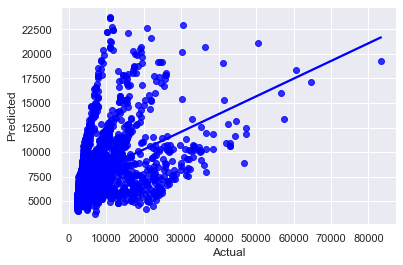

In [91]:
#Regression plot of our model.
#A regression plot is useful to understand the linear relationship between two parameters. 
#It creates a regression line in-between those parameters and then plots a scatter plot of those data points.
sns.regplot(x=y_test,y=predictions,ci=None,color ='Blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [92]:
Train_r_sq = model.score(X_train,y_train)
print('coefficient of determination for training data:', Train_r_sq)
Test_r_sq = model.score(X_test,y_test)
print('coefficient of determination for test data:', Test_r_sq)
#Accuracy 
Accuracy=r2_score(y_test,predictions)*100
print('Accuracy: ',Accuracy)

coefficient of determination for training data: 0.1639117165384144
coefficient of determination for test data: 0.1671158928057066
Accuracy:  16.71158928057066


In [98]:
X=encoded_data.drop(['CustomerLifetimeValue'],axis=1)
X_new= X.drop(['MonthsSinceLastClaim', 'MonthsSincePolicyInception','TotalClaimAmount',
               'EmploymentStatus_Disabled','EmploymentStatus_Medical Leave','EmploymentStatus_Retired',
               'EmploymentStatus_Unemployed','MaritalStatus_Single','RenewOfferType_Offer1','VehicleClass_Four-Door Car',
               'VehicleClass_Two-Door Car'],axis=1)

In [99]:
#Linear Regression again with dropped features.
#Splitting the dataset into train and validation test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,random_state=42,test_size = 0.3)
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print('R^2 score for train:',lr.score(X_train, y_train))
print('R^2 score for test:',lr.score(X_test, y_test))

R^2 score for train: 0.16328749878760385
R^2 score for test: 0.16808485556403152


In [100]:
predictions = model.predict(X_test)

In [101]:
print('MSE: ',mean_squared_error(y_test,predictions))
#Accuracy 
Accuracy=r2_score(y_test,predictions)*100
print('Accuracy: ',Accuracy)

MSE:  37814698.83705475
Accuracy:  16.808485556403152


In [102]:
# Slight improvement after dropping features.

In [103]:
# Rigde and Lasso Regression

In [104]:
from sklearn.linear_model import Ridge, Lasso
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
print('R^2 score for train:',ridge.score(X_train, y_train))
print('R^2 score for test:',ridge.score(X_test, y_test))
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#Accuracy 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy) 

Ridge Regression
R^2 score for train: 0.16269234112828757
R^2 score for test: 0.1691926685310785
RMSE: 6145.269986260583
Accuracy:  16.91926685310785


In [105]:
ridge=Ridge(alpha=0.0000000001,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression-2')
print('R^2 score for train:',ridge.score(X_train, y_train))
print('R^2 score for test:',ridge.score(X_test, y_test))
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#Accuracy 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy) 

Ridge Regression-2
R^2 score for train: 0.16328749878760385
R^2 score for test: 0.16808485556622743
RMSE: 6149.365726394466
Accuracy:  16.808485556622742


In [106]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Lasso Regression')
print('R^2 score for train:',lasso.score(X_train, y_train))
print('R^2 score for test:',lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#Accuracy 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy) 

Lasso Regression
R^2 score for train: 0.16326927903240407
R^2 score for test: 0.16796827041066398
RMSE: 6149.796599452135
Accuracy:  16.796827041066397


In [108]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 5705.836428514661
MAE 2017.3808056428168
R-squared: 0.28376255992434896


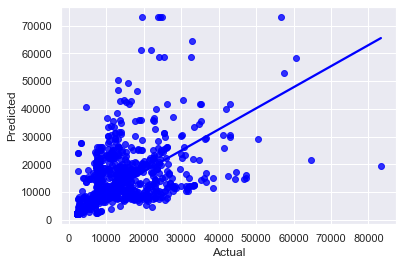

In [109]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='Blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [110]:
Train_r_sq = model.score(X_train,y_train)
print('coefficient of determination for training data:', Train_r_sq)
Test_r_sq = model.score(X_test,y_test)
print('coefficient of determination for test data:', Test_r_sq)
#Accuracy 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy)

coefficient of determination for training data: 0.16328749878760385
coefficient of determination for test data: 0.16808485556403152
Accuracy:  28.376255992434896


In [111]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy)

RMSE: 4126.946791221853
MAE 1731.1262526244236
R-squared: 0.625306530784969
Accuracy:  62.5306530784969


In [112]:
#Feature importance
pd.Series(rf.feature_importances_, index=X_new.columns).sort_values(ascending=False)*100


NumberofPolicies             45.463600
MonthlyPremiumAuto           29.536683
Zones                         4.159313
Education                     4.060596
VehicleSize                   2.410273
NumberofOpenComplaints        2.045380
EmploymentStatus_Employed     1.702071
RenewOfferType_Offer2         1.613743
MaritalStatus_Married         1.537192
Coverage                      1.498343
RenewOfferType_Offer3         1.243869
MaritalStatus_Divorced        1.073128
VehicleClass_SUV              0.953463
RenewOfferType_Offer4         0.947080
VehicleClass_Luxury SUV       0.700729
VehicleClass_Sports Car       0.664426
VehicleClass_Luxury Car       0.390110
dtype: float64

In [113]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(RandomForestRegressor(max_depth=5,criterion='mse'),n_estimators=150)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [114]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 4625.999064493786
MAE 2727.290002133257
R-squared: 0.529207575877098


In [115]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy: ',Accuracy)

RMSE: 3906.745218102963
MAE 1791.7031406534697
R-squared: 0.6642248413784121
Accuracy:  66.42248413784121


In [116]:
# Of all the models we decided to choose gradient boosting as the next model, and furthur tweak the hyper parameter's of the model and also put this boosting model into bagging regressor and check for the model accuracy.

In [117]:
#Hyperparameter Tuning of GB Regressor
from sklearn.model_selection import GridSearchCV
#Tree-Specific Parameters: These affect each individual tree in the model.
#Boosting Parameters: These affect the boosting operation in the model.
#Miscellaneous Parameters: Other parameters for overall functioning.
#Fix learning rate and number of estimators for tuning tree-based parameters
#initial values 
#min_samples_split = 500 #0.5 to 1% of total values 
#min_samples_leaf = 50
#max_depth = 5 #(5-8)
#max_features = 'sqrt' 
#subsample = 0.8
#learning_rate= 0.3

param_test1 = {'n_estimators':range(20,100,20)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.3,
                                                               min_samples_split=500,min_samples_leaf=50,
                                                               max_depth=5,max_features='sqrt',subsample=0.8,
                                                               random_state=10), 
param_grid = param_test1,n_jobs=4, cv=5,error_score='raise')

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,random_state=42,test_size = 0.3)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingRegressor(learning_rate=0.3, max_depth=5,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 100, 20)})

In [119]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 80}, 0.6332993508478613)

In [120]:
#Tuning tree-specific parameters
#Tune max_depth and num_samples_split
#Tune min_samples_leaf
#Tune max_features
#Tune max_depth and num_samples_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.3, n_estimators=80,
                                                               max_features='sqrt', subsample=0.8,
                                                               random_state=10), 
param_grid = param_test2,n_jobs=4, cv=5,error_score='raise')


In [121]:
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 7, 'min_samples_split': 1000}, 0.6391266574283927)

In [122]:
#last tree-parameters
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.3, n_estimators=80,
                                                              max_depth=5, min_samples_split=800, min_samples_leaf=50, 
                                                              subsample=0.8, random_state=10),
param_grid = param_test4,n_jobs=4, cv=5)

gsearch4.fit(X_train,y_train)

gsearch4.best_params_, gsearch4.best_score_

({'max_features': 15}, 0.6466250333214043)

In [123]:
# Tuning is not helping in increasing the accuracy. Therefore we should try to use this model in a boosting regressor.
# Final Model - Boosting and Bagging
from sklearn.ensemble import BaggingRegressor
gbr2 = GradientBoostingRegressor()
br2 = BaggingRegressor(gbr2)
#Finding the best sample 
print('Test score, Train Score')
temp = 0
for j in range(1,20):
    NX_train,NX_test,Ny_train,Ny_test = train_test_split(X,y,test_size=0.3,random_state=j)
    br2.fit(NX_train,Ny_train)
    test_score = br2.score(NX_test,Ny_test)
    train_score = br2.score(NX_train,Ny_train)
    if test_score>temp:
        temp = test_score
        print(j,train_score,temp)

Test score, Train Score
1 0.7094495184165284 0.658066401554875
2 0.7128311504959115 0.6608702480656481
5 0.7081091945660252 0.6613469169905446
7 0.7067361934661951 0.6696513299490376


In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=87)
br2.fit(X_train,y_train)
y_pred_br2 = br2.predict(X_test)

In [125]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_br2)))
print("MAE",mean_absolute_error(y_test,y_pred_br2))
print('R-squared:',r2_score(y_test,y_pred_br2)) 
Accuracy=r2_score(y_test,y_pred_br2)*100
print('Accuracy: ',Accuracy)

RMSE: 3898.0706734477276
MAE 1872.1604204504183
R-squared: 0.6494063533645318
Accuracy:  64.94063533645318


In [ ]:
# Hyperparameter tuning of random forest

In [126]:
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        'bootstrap' : [True, False]
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True, 'max_depth': 20, 'n_estimators': 200}

In [127]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 3859.987603828421
MAE 1650.712006126561
R-squared: 0.6562232955132132


In [ ]:
# Randomforest has responded to hyperparameter tuning. 
# But the best model accuracy is given by Gradient boosting regressor.(66.42248413784121)